<a href="https://colab.research.google.com/github/HungYangChang/ECSE551/blob/master/hepatitis_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load hepatitis data
url = "https://raw.githubusercontent.com/jonarsenault/ecse551data/master/hepatitis.csv"
hep_data = pd.read_csv(url)

# Display some of the data
print(hep_data.head())

# Print size of data
hep_data.shape


   age  sex  steroid  antivirals  ...  albumin  protime  histology  ClassLabel
0   30    2        1           2  ...      4.0       61          1           1
1   50    1        1           2  ...      3.5       61          1           1
2   78    1        2           2  ...      4.0       61          1           1
3   34    1        2           2  ...      4.0       61          1           1
4   34    1        2           2  ...      4.0       75          1           1

[5 rows x 20 columns]


(142, 20)

1    116
0     26
Name: ClassLabel, dtype: int64


Text(0, 0.5, 'Count')

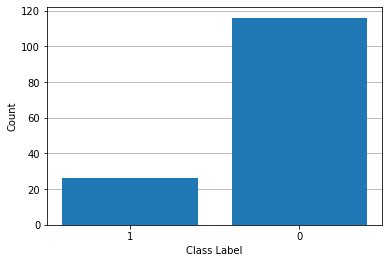

In [ ]:
# Plot distribution of class labels
label_counts = hep_data["ClassLabel"].value_counts()
print(label_counts)
unique_labels = hep_data["ClassLabel"].unique()

fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(unique_labels, label_counts, zorder=2)
ax.set_xticks([0,1])
ax.set_xticklabels(unique_labels)
ax.set_xlabel("Class Label")
ax.set_ylabel("Count")

Text(0, 0.5, 'Standard Deviation')

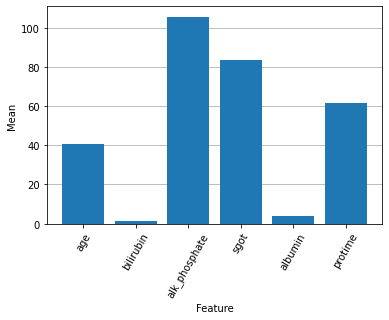

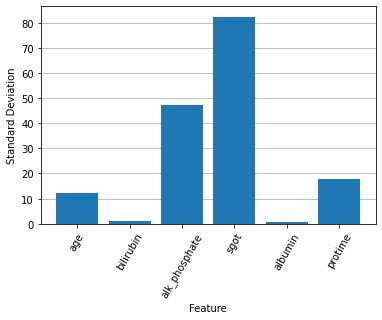

In [ ]:
# Mean and standard deviation of numeric features

#List of column names that are numeric
num_columns = [
    "age",
    "bilirubin",
    "alk_phosphate",
    "sgot",
    "albumin",
    "protime",
]

# Indices of features
index_cat_columns = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18])
index_numeric_columns = np.array([0, 13, 14, 15, 16, 17])

# Compute mean of each numerical feature
means = hep_data.loc[:, num_columns].mean()

# Compute standard deviation of each feature
std = hep_data.loc[:, num_columns].std()

# Plot mean and standard deviation of each numerical feature
features = np.arange(1, len(num_columns) + 1)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, means, zorder=2)
ax.set_xticks(np.arange(1, len(num_columns) + 1))
ax.set_xticklabels(num_columns, rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Mean")

fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, std, zorder=2)
ax.set_xticks(np.arange(1, len(num_columns) + 1))
ax.set_xticklabels(num_columns, rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Standard Deviation")


[0.16004983 0.46153323 0.14971797 0.02545683 0.45418086 0.29873707]


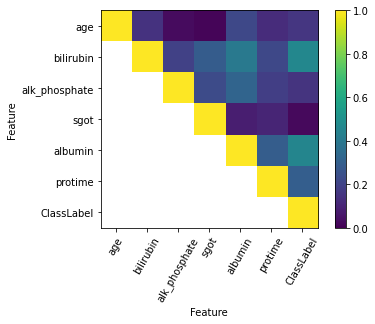

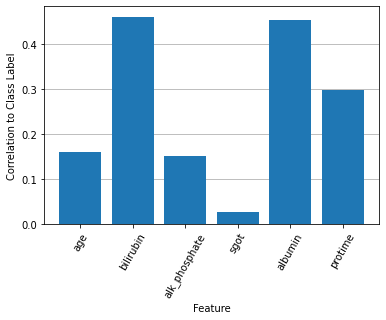

In [ ]:
# Compute correlation of numeric features
save_fig = False

# Compute correlation only for numerical features
correlation = np.abs(hep_data.loc[:,num_columns + ["ClassLabel"]].corr())
correlation_arr = correlation.to_numpy()
for i in range(correlation_arr.shape[0]):
    for j in range(i):
        correlation_arr[i,j] = np.nan

# Plot as image
fig, ax = plt.subplots()
im = ax.imshow(correlation_arr, vmin= 0, vmax=1.0)
plt.colorbar(im)
ax.set_xticks(np.arange(len(num_columns) + 1))
ax.set_yticks(np.arange(len(num_columns) + 1))
ax.set_xticklabels(num_columns  + ["ClassLabel"], rotation=60)
ax.set_yticklabels(num_columns  + ["ClassLabel"])
ax.set_xlabel("Feature")
ax.set_ylabel("Feature")

# Plot bar graph of correlation to class label
features = np.arange(len(num_columns))
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, correlation_arr[:-1, -1], zorder=2)
ax.set_xticks(np.arange(0, len(num_columns)))
ax.set_xticklabels(num_columns, rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Correlation to Class Label")
if save_fig:
  plt.tight_layout()
  plt.savefig("hep_correlation_bar.pdf", bbox_inches="tight", pad_inches=0)

print(correlation_arr[:-1,-1])


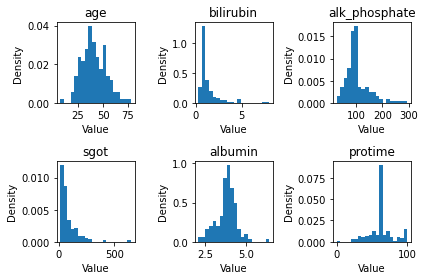

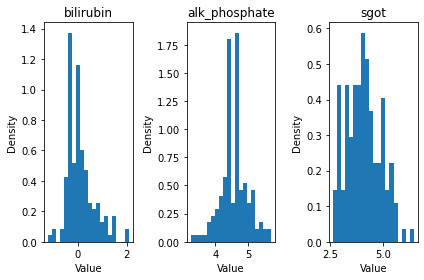

In [ ]:
save_fig = False

fig_all, ax = plt.subplots(2, 3)
col = 0
for x, axis in enumerate(ax.ravel()):
  axis.hist(hep_data.loc[:, num_columns[col]], bins=20, density=True)
  axis.set_title(num_columns[col])
  axis.set_xlabel("Value")
  axis.set_ylabel("Density")
  col+=1
fig_all.tight_layout()
if save_fig:
  plt.savefig("hep_data_distributions.pdf", bbox_inches="tight", pad_inches=0)

features_to_log = ["bilirubin", "alk_phosphate", "sgot"]
fig, ax = plt.subplots(1, 3)
col = 0
for x, axis in enumerate(ax.ravel()):
  axis.hist(np.log(hep_data.loc[:, features_to_log[col]]), bins=20, density=True)
  axis.set_title(features_to_log[col])
  axis.set_xlabel("Value")
  axis.set_ylabel("Density")
  col+=1
fig.tight_layout()

Text(0.5, 1.0, 'Distribution of categorical features given a class label of 0.')

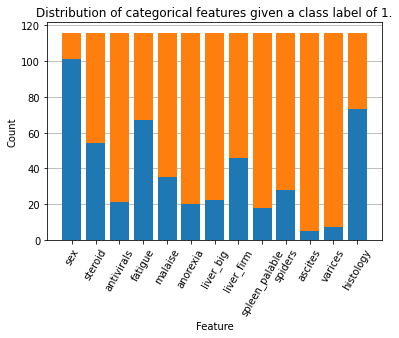

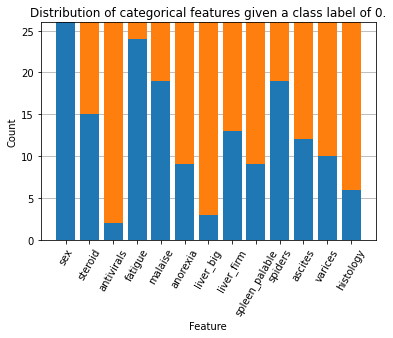

In [ ]:
cat_columns = [
    "sex",
    "steroid",
    "antivirals",
    "fatigue",
    "malaise",
    "anorexia",
    "liver_big",
    "liver_firm",
    "spleen_palable",
    "spiders",
    "ascites",
    "varices",
    "histology"
]

# Compute the value of each categorical feature when label is 1
label_one = hep_data.loc[hep_data["ClassLabel"] == 1,cat_columns]
count_two = label_one[label_one == 2].count()
count_one = label_one[label_one == 1].count()

features = np.arange(1, len(cat_columns) + 1)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, count_one, zorder=2)
ax.bar(features, count_two, bottom=count_one, zorder=2)
ax.set_xticks(np.arange(1, len(cat_columns) + 1))
ax.set_xticklabels(cat_columns, rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Count")
ax.set_title("Distribution of categorical features given a class label of 1.")

# Compute the value of each categorical feature when label is 1
label_two = hep_data.loc[hep_data["ClassLabel"] == 0,cat_columns]

count_two = label_two[label_two == 2].count()
count_one = label_two[label_two == 1].count()

features = np.arange(1, len(cat_columns) + 1)
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, count_one, zorder=2)
ax.bar(features, count_two, bottom=count_one, zorder=2)
ax.set_xticks(np.arange(1, len(cat_columns) + 1))
ax.set_xticklabels(cat_columns, rotation=60)
ax.set_xlabel("Feature")
ax.set_ylabel("Count")
ax.set_title("Distribution of categorical features given a class label of 0.")


# Change Log

James: 
- Build a function called Chi_squared_test (Right after your code) return dependent and independent list. \\
 I added some comments for better interpretation of Chi square test.
- Ctrl+F Note: When value are all one no two, label_zero[feature].value_counts()[2] will be error! e.g. column 
"sex" \\
 Create a stupid if else to avoid it.




In [ ]:
# Chi-squared test of independence 

label_one = hep_data.loc[hep_data["ClassLabel"] == 1,cat_columns]
label_zero = hep_data.loc[hep_data["ClassLabel"] == 0,cat_columns]

# Try steroid
feature = "liver_firm"
num_samples = hep_data.shape[0]

##             class label
##               0   | 1        total
##  feature 1   01   | 11     feature 1
##  feature 2   02   | 12     feature 2 
##            class0   class1


# prob of label =0 or =1
probability_label_0 = label_zero.shape[0] / num_samples
probability_label_1 = label_one.shape[0] / num_samples

# prob of feature =1 or =2 (for categorical data)
probability_feature_1 = hep_data[feature].value_counts()[1] / num_samples
probability_feature_2 = hep_data[feature].value_counts()[2] / num_samples

print(probability_label_0)
print(probability_label_1)
print(probability_feature_1)
print(probability_feature_2)

# number of label =0 when feature =1 or =2
observed_01 = label_zero[feature].value_counts()[1]
observed_02 = label_zero[feature].value_counts()[2]

# number of label =1 when feature =1 or =2
observed_11 = label_one[feature].value_counts()[1]
observed_12 = label_one[feature].value_counts()[2]

# if it's independent, expected number of label =0 when feature =1 or =2 
expected_01 = probability_label_0 * probability_feature_1 * num_samples
expected_02 = probability_label_0 * probability_feature_2 * num_samples

expected_11 = probability_label_1 * probability_feature_1 * num_samples
expected_12 = probability_label_1 * probability_feature_2 * num_samples

print(observed_01, observed_02, observed_11, observed_12)
print(expected_01, expected_02, expected_11, expected_12)

diff_01 = observed_01 - expected_01
diff_02 = observed_02 - expected_02
diff_11 = observed_11 - expected_11
diff_12 = observed_12 - expected_12

print(diff_01, diff_02, diff_11, diff_12)

squared_diff_norm_01 = (diff_01)**2 / expected_01 
squared_diff_norm_02 = (diff_02)**2 / expected_02 
squared_diff_norm_11 = (diff_11)**2 / expected_11 
squared_diff_norm_12 = (diff_12)**2 / expected_12 

chi_squared = squared_diff_norm_12 + squared_diff_norm_11 + squared_diff_norm_02 + squared_diff_norm_01
print(chi_squared)

# df=(r-1)(c-1)
from scipy import stats
p_value = stats.chi2.ppf(0.95, df=1)
print(p_value)

if (chi_squared<p_value):
  print ("They are independent variable")


0.18309859154929578
0.8169014084507042
0.4154929577464789
0.5845070422535211
13 13 46 70
10.802816901408452 15.19718309859155 48.19718309859155 67.80281690140845
2.197183098591548 -2.19718309859155 -2.1971830985915517 2.1971830985915517
0.9359143177033089
3.841458820694124
They are independent variable


independent: ['sex', 'steroid', 'antivirals', 'liver_big', 'liver_firm']
dependent: ['fatigue', 'malaise', 'anorexia', 'spleen_palable', 'spiders', 'ascites', 'varices', 'histology']
3.841458820694124


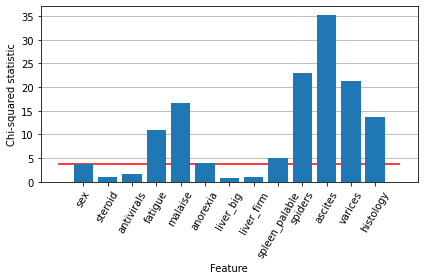

In [ ]:

  # https://www.youtube.com/watch?v=L1QPBGoDmT0
  ##             class label
  ##               0   | 1        total
  ##  feature 1   01   | 11     feature 1
  ##  feature 2   02   | 12     feature 2 
  ##            class0   class1

def Chi_squared_test(hep_data,cat_columns):
  from scipy import stats
  label_one = hep_data.loc[hep_data["ClassLabel"] == 1,cat_columns]
  label_zero = hep_data.loc[hep_data["ClassLabel"] == 0,cat_columns]
  independent_list = []
  dependent_list = []
  chi_squared_list = []
  for i in (cat_columns):
    feature = i
    num_samples = hep_data.shape[0]

    # prob of label =0 or =1
    probability_label_0 = label_zero.shape[0] / num_samples
    probability_label_1 = label_one.shape[0] / num_samples

    # prob of feature =1 or =2 (for categorical data)
    probability_feature_1 = hep_data[feature].value_counts()[1] / num_samples
    probability_feature_2 = hep_data[feature].value_counts()[2] / num_samples

    ## Note! When value are all one no two, label_zero[feature].value_counts()[2] will be error! e.g. sex
    # number of label =0 when feature =1 or =2
    if (i=="sex"):
      observed_01 = label_zero[feature].value_counts()[1]
      observed_02 = 0
    else:
      observed_01 = label_zero[feature].value_counts()[1]
      observed_02 = label_zero[feature].value_counts()[2]

    # number of label =1 when feature =1 or =2
    observed_11 = label_one[feature].value_counts()[1]
    observed_12 = label_one[feature].value_counts()[2]

    # if it's independent, expected number of label =0 when feature =1 or =2 
    expected_01 = probability_label_0 * probability_feature_1 * num_samples
    expected_02 = probability_label_0 * probability_feature_2 * num_samples

    expected_11 = probability_label_1 * probability_feature_1 * num_samples
    expected_12 = probability_label_1 * probability_feature_2 * num_samples

    diff_01 = observed_01 - expected_01
    diff_02 = observed_02 - expected_02
    diff_11 = observed_11 - expected_11
    diff_12 = observed_12 - expected_12

    squared_diff_norm_01 = (diff_01)**2 / expected_01 
    squared_diff_norm_02 = (diff_02)**2 / expected_02 
    squared_diff_norm_11 = (diff_11)**2 / expected_11 
    squared_diff_norm_12 = (diff_12)**2 / expected_12 

    chi_squared = squared_diff_norm_12 + squared_diff_norm_11 + squared_diff_norm_02 + squared_diff_norm_01

    # df=(r-1)(c-1)
    p_value = stats.chi2.ppf(0.95, df=1)

    chi_squared_list.append(chi_squared)

    if (chi_squared<p_value):
      # print (f"Class label and {feature} are independent variable")
      independent_list.append(feature)
    else:
      # print (f"Class label and {feature} are dependent variable")
      dependent_list.append(feature)

  return  independent_list, dependent_list, chi_squared_list

independent_list, dependent_list, chi_squared_list = Chi_squared_test(hep_data,cat_columns)
print ("independent:", independent_list)
print ("dependent:", dependent_list)

p_value = stats.chi2.ppf(0.95, df=1)
print (p_value)
save_fig = True

# Plot chi-squared statistic
features = np.arange(0, len(cat_columns))
fig, ax = plt.subplots()
ax.grid(zorder=1, axis="y")
ax.bar(features, chi_squared_list, zorder=2)
ax.set_xticks(np.arange(0, len(cat_columns)))
ax.set_xticklabels(cat_columns, rotation=60)
ax.hlines(p_value, *ax.get_xlim(), color="r")
ax.set_xlabel("Feature")
ax.set_ylabel("Chi-squared statistic")
if save_fig:
  plt.tight_layout()
  plt.savefig("hep_chi_squared.pdf", bbox_inches="tight", pad_inches=0)
